# **Fórmula de Ackerman**

## Problemas mais realistas

O exemplo anterior ilustra bem a solução do problema de realimentação de estados. Porém, ele é simples demais:
* Ele é de ordem baixa (2). Na prática, os sistemas podem ser de ordem bem mais elevada
* Em um problema de ordem mais alta, o trabalho seria muito maior e o método apresentado, inviável
* Além disso, em um problema real temos também que nos preocupar com questões numéricas de arredondamento.

## Forma canônica de controlador

A primeira forma de lidar com problemas de ordem mais alta é transformar o sistema para forma canônica de controlador. 

Usar essa forma é vantajoso porque ela simplifica as equações dos ganhos na hora que igualamos os polinômios desejado e de projeto. Isso permite encontrar os ganhos com equações mais simples, geralmente fazendo substituições sucessivas.

Normalmente, a forma mais fácil de mudar para a forma de controlador é achando a função de transferência do sistema e usando as regras práticas de inspeção do numerador e denominador. 

Isso pode ser um pouco trabalhoso para sistemas de ordem elevada.

## Método de Ackermann

Uma maneira mais direta e geral de projetar a realimentação de estados é usar o método de Ackerman. Ele consiste de aplicar a expressão:

$$
\begin{align}
    \mathbf{K} = \left[\begin{array}{ccccc}0&0&\ldots & 0 & 1\end{array}\right]\mathbf{\mathcal{C}}^{-1}\alpha_c(\mathbf{A})
\end{align}
$$
onde $\mathbf{\mathcal{C}}$ é a matriz de controlabilidade do sistema
$$
\begin{align}
    \mathbf{\mathcal{C}} = \left[\begin{array}{ccccc}\mathbf{B}&\mathbf{AB}&\ldots & \mathbf{A}^{n-2}\mathbf{B} & \mathbf{A}^{n-1}\mathbf{B}\end{array}\right]
\end{align}
$$
e $\alpha_c(\mathbf{A})$ é uma matriz construída pela expressão:
$$
\begin{align}
    \alpha_c(\mathbf{A}) = \mathbf{A}^{n}+\alpha_1\mathbf{A}^{n-1}+\alpha_2\mathbf{A}^{n-2}+\ldots++\alpha_n\mathbf{I}
\end{align}
$$

Note que $\alpha_c(\mathbf{A})$ é o polinômio de malha fechado desejado, mas no lugar de $s$ temos a matriz $\mathbf{A}$ de malha aberta do sistema. 

O método é trabalhoso, mas fácil de implementar no computador. Em Python temos a função "acker()" da biblioteca *control* que faz o processo automaticamente (sem precisar fornecer a forma de controlador), que funciona bem para sistemas de até 10a ordem e preferencialmente com pólos de malha fechada não-repetidos.

Para problemas mais complexos, recomenda-se o uso da função "place()" da biblioteca *control*, ou "place_poles()" da biblioteca *scipy.signal*.

Nota: essas funções só funcionam para problemas numéricos. Não se recomenda utilizá-las com objetos simbólicos. 

## Exemplo:

<p align="center">
<img src="Ex7.16.svg" width="80%">
</p>

In [13]:
# Imports
import numpy as np
import sympy as sp
from IPython.display import display, Math

In [14]:
# Declara os parâmetros do problema
display(Math(r'\omega_0 = 1'))
w0 = 1
# Define as matrizes do sistema
A = sp.Matrix([[0,1],[-w0**2,0]])
B = sp.Matrix([[0],[1]])
display(Math(r'\mathbf{A} = ' + sp.latex(A)))
display(Math(r'\mathbf{B} = ' + sp.latex(B)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
# Matriz de controlabilidade
C = sp.BlockMatrix([B,A@B])
C = sp.Matrix(C)
display(Math(r'\mathbf{AB} = ' + sp.latex(A) + sp.latex(B) + ' = ' + sp.latex(A@B)))
display(Math(r'\mathcal{C} = ' + sp.latex(C)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [16]:
# Inversa
display(Math(r'\mathbf{\mathcal{C}}^{-1} = ' + sp.latex(C.inv())))

<IPython.core.display.Math object>

In [17]:
# Polinômio desejado
display(Math(r'\alpha(s) = s^2+4\omega_0s+4\omega_0^2'))

<IPython.core.display.Math object>

In [18]:
# Matriz da alpha da fórmula de Ackerman
display(Math(r'\alpha(\mathbf{A}) = \mathbf{A}^2 + 4\omega_0\mathbf{A} + 4\omega_0^2\mathbf{I}' ))
Alpha = A@A + 4*w0 * A + 4*w0**2*sp.eye(2)
eq1 = r' = ' + sp.latex(A) + sp.latex(A)
eq1 += r' + 4\omega_0' + sp.latex(A)
eq1 += r' + 4\omega_0^2' + sp.latex(sp.eye(2))
display(Math(eq1))
display(Math(r' = ' + sp.latex(Alpha)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [19]:
# Fórmula de Ackermann
v = sp.Matrix([0,1]).T
display(Math(r'\mathbf{K} = [0\quad 1]\mathbf{\mathcal{C}}^{-1}\mathbf{\alpha(A)}'))
display(Math(r'\mathbf{K} = ' + sp.latex(v) + sp.latex(C.inv()) + sp.latex(Alpha)))
display(Math(r'= ' + sp.latex(v@C.inv()) + sp.latex(Alpha)))
display(Math(r'= ' + sp.latex(v@C.inv()@Alpha)))
K = v @ C.inv() @ Alpha 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Eis um fato interessante: Ackermann permite posicionar os pólos de malha fechada **em qualquer lugar desejado**, mas isso só é possível se a matriz de controlabilidade possuir inversa.

No entanto, lembre-se que estamos sob uma hipótese forte de que todos os estados estão disponíveis para realimentação. 

## Exemplo:
<p align="center">
<img src="Ex7.17.svg" width="80%">
</p>

Abaixo apenas o item (b), resolvendo direto com acker()

In [20]:
# Imports
import control as ct
import numpy as np
from escrever import *
from IPython.display import display, Math
esc = escrever()

In [76]:
z0 = -5.

In [77]:
# Declaração das matrizes e do sistema
A = np.array([[-7,1],[-12,0]])
B = np.array([[1],[-z0]])
C = np.array([[1,0]])
D = np.array([[0]])
sys = ct.ss(A,B,C,D)
esc.sist(A,B,C,D)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [78]:
ct.tf(sys)

TransferFunction(array([1., 5.]), array([ 1.,  7., 12.]))

In [79]:
# Pólos desejados
xi = 0.5
wn = 2
polo = -xi*wn+1j*wn*np.sqrt(1-xi**2)
display(Math(r'\xi = ' + f'{xi}' + r',\quad\omega_n = ' + f'{wn}'))
display(Math(r'p = ' + f'{np.round(polo,4)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [80]:
# Alocação de polos
K = ct.acker(A,B,[polo, np.conj(polo)])
display(Math(r'\mathbf{K} = ' + esc.mat(K)))

<IPython.core.display.Math object>

Execute novamente o código com $z_0=3$ para verificar a variação dos ganhos como no livro. Espera-se que haja um aumento significativo nos ganhos. 

Quando um polo e um zero tendem a se cancelar, o sistema tende a perder controlabilidade e isso torna os ganhos mais altos e, consequentemente, o controle fica mais "caro" (puxa mais energia). Vale a observação do livro:

**"O sistema tem que trabalhar com mais força para conseguir o controle quando a controlabilidade é fraca."**

Além disso:

**"Mover os polos em um longo caminho requer grandes ganhos."**

Isso é observado quando um sistema é naturalmente lento e tentamos deixá-lo mais rápido. Isso normalmente resulta em ganhos grandes (em módulo), o que resulta novamente em um controle "caro".

## Exercício

Use Ackermann para projetar um controlador para o sistema
$$
\begin{align}
    G(s) &= \frac{30}{s(s+1)^2}
\end{align}
$$

Posicione os dominantes em $-4\pm j4$.


[  1.  12.  64. 128.]
[[ 10.  63. 128.]]


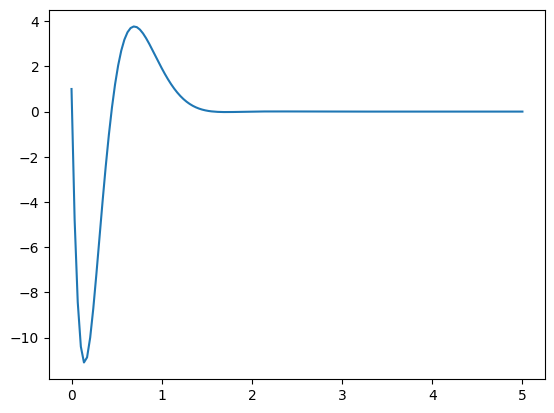

In [92]:
A = np.array([[-2, -1, 0],[1,0,0],[0,1,0]])
B = np.array([[1],[0],[0]])
p = -4
polos = [-4+4j,-4-4j,p]
alpha = np.poly(polos)
print(alpha)
K = ct. acker(A,B,polos)
print(K)
Amf = A-B@K
Bmf = np.zeros((3,1))
Cmf = np.eye(3)
Dmf = np.zeros((3,1))
mf = ct.ss(Amf,Bmf,Cmf,Dmf)
t,y = ct.initial_response(mf,5,[1,1,1])
from matplotlib import pyplot as plt
plt.plot(t,y[0])